### Introduction
* Sequence of operation applied to matrix of input data
* These operation are usually collections of additions & multiplications
* The important trick with neural networks is called 'backpropagation'. Back propagation is a procedure that allows us to update the model variables based on the learning rate and the output of the loss function. 
* Another important feature to take note of in neural networks is the non-linear activation function. Since most neural networks are just combinations of addition and multiplication operations, they will not be able to model non-linear datasets. To address this issue, we have used the non-linear activation functions in the neural networks. This will allow the neural network to adapt to most non-linear situations.

### Implementaing Operational Gates
<img src="https://www.safaribooksonline.com/library/view/tensorflow-machine-learning/9781786462169/graphics/B05480_06_01.jpg">

In [30]:
import tensorflow as tf
sess = tf.Session()

In [31]:
a = tf.Variable(tf.constant(4.))
x_val = 5.
x_data = tf.placeholder(dtype=tf.float32)

In [32]:
multiplication = tf.mul(a, x_data)

In [33]:
loss = tf.square(tf.sub(multiplication, 50.))

In [34]:
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

In [35]:
print('Optimizing a Multiplication Gate Output to 50.')
for i in range(10):
    sess.run(train_step, feed_dict={x_data: x_val})
    a_val = sess.run(a)
    mult_output = sess.run(multiplication, feed_dict={x_data: x_val})
    print(str(a_val) + ' * ' + str(x_val) + ' = ' + str(mult_output))

Optimizing a Multiplication Gate Output to 50.
7.0 * 5.0 = 35.0
8.5 * 5.0 = 42.5
9.25 * 5.0 = 46.25
9.625 * 5.0 = 48.125
9.8125 * 5.0 = 49.0625
9.90625 * 5.0 = 49.5313
9.95313 * 5.0 = 49.7656
9.97656 * 5.0 = 49.8828
9.98828 * 5.0 = 49.9414
9.99414 * 5.0 = 49.9707


### We will do the same for f(x)= a.x + b

In [36]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [37]:
#Initialize two model variables a,b
a = tf.Variable(tf.constant(1.))
b = tf.Variable(tf.constant(1.))

In [38]:
x_val = 5.
x_data = tf.placeholder(dtype=tf.float32)

In [39]:
two_gate = tf.add(tf.mul(a,x_data),b)

In [40]:
loss = tf.square(tf.sub(two_gate,50))

In [41]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

In [42]:
init = tf.global_variables_initializer()

In [43]:
sess.run(init)

In [44]:
print('\nOptimizing Two Gate Output to 50.')
for i in range(10):
    # Run the train step
    sess.run(train_step, feed_dict={x_data: x_val})
    # Get the a and b values
    a_val, b_val = (sess.run(a), sess.run(b))
    # Run the two-gate graph output
    two_gate_output = sess.run(two_gate, feed_dict={x_data: x_val})
    print(str(a_val) + ' * ' + str(x_val) + ' + ' + str(b_val) + ' = ' + str(two_gate_output))


Optimizing Two Gate Output to 50.
5.4 * 5.0 + 1.88 = 28.88
7.512 * 5.0 + 2.3024 = 39.8624
8.52576 * 5.0 + 2.50515 = 45.134
9.01236 * 5.0 + 2.60247 = 47.6643
9.24593 * 5.0 + 2.64919 = 48.8789
9.35805 * 5.0 + 2.67161 = 49.4619
9.41186 * 5.0 + 2.68237 = 49.7417
9.43769 * 5.0 + 2.68754 = 49.876
9.45009 * 5.0 + 2.69002 = 49.9405
9.45605 * 5.0 + 2.69121 = 49.9714


#### Working with Gates and Activation Functions
<img src="https://www.safaribooksonline.com/library/view/tensorflow-machine-learning/9781786462169/graphics/B05480_06_11.jpg">

* Create two layer neural network - one layer through sigmoid function & another layer reLU
* Loss function will be governed by L2 distance from 0.75
* We will randomly pull data from normal distribution
* Optimize towards 0.75

In [45]:
import numpy as np
import matplotlib.pyplot as plt
sess = tf.Session()
tf.set_random_seed(5)
np.random.seed(42)

In [46]:
batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_uniform(shape=[1,1]))
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2, 0.1, 500)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [47]:
x

array([ 2.04967142,  1.98617357,  2.06476885,  2.15230299,  1.97658466,
        1.9765863 ,  2.15792128,  2.07674347,  1.95305256,  2.054256  ,
        1.95365823,  1.95342702,  2.02419623,  1.80867198,  1.82750822,
        1.94377125,  1.89871689,  2.03142473,  1.90919759,  1.85876963,
        2.14656488,  1.97742237,  2.00675282,  1.85752518,  1.94556173,
        2.01109226,  1.88490064,  2.0375698 ,  1.93993613,  1.97083063,
        1.93982934,  2.18522782,  1.99865028,  1.89422891,  2.08225449,
        1.87791564,  2.02088636,  1.80403299,  1.8671814 ,  2.01968612,
        2.07384666,  2.01713683,  1.98843517,  1.96988963,  1.8521478 ,
        1.92801558,  1.95393612,  2.10571222,  2.03436183,  1.82369598,
        2.0324084 ,  1.96149177,  1.9323078 ,  2.06116763,  2.10309995,
        2.09312801,  1.91607825,  1.96907876,  2.03312634,  2.09755451,
        1.95208258,  1.9814341 ,  1.8893665 ,  1.88037934,  2.08125258,
        2.135624  ,  1.99279899,  2.10035329,  2.0361636 ,  1.93

In [56]:
# Start Graph Session
sess = tf.Session()
tf.set_random_seed(5)
np.random.seed(42)

batch_size = 50

a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_uniform(shape=[1,1]))
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2, 0.1, 500)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))

relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

In [57]:
# Declare the loss function as the difference between
# the output and a target value, 0.75.
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))

In [58]:

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [59]:

# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)

In [60]:
# Run loop across gate
print('\nOptimizing Sigmoid AND Relu Output to 0.75')
loss_vec_sigmoid = []
loss_vec_relu = []
for i in range(500):
    rand_indices = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_indices]])
    sess.run(train_step_sigmoid, feed_dict={x_data: x_vals})
    sess.run(train_step_relu, feed_dict={x_data: x_vals})
    
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data: x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data: x_vals}))    
    
    sigmoid_output = np.mean(sess.run(sigmoid_activation, feed_dict={x_data: x_vals}))
    relu_output = np.mean(sess.run(relu_activation, feed_dict={x_data: x_vals}))
    
    if i%50==0:
        print('sigmoid = ' + str(np.mean(sigmoid_output)) + ' relu = ' + str(np.mean(relu_output)))


Optimizing Sigmoid AND Relu Output to 0.75
sigmoid = 0.611362 relu = 3.47531
sigmoid = 0.644543 relu = 0.756283
sigmoid = 0.668274 relu = 0.748436
sigmoid = 0.685683 relu = 0.7499
sigmoid = 0.699268 relu = 0.758795
sigmoid = 0.7092 relu = 0.760493
sigmoid = 0.716958 relu = 0.751913
sigmoid = 0.722561 relu = 0.743455
sigmoid = 0.727813 relu = 0.75397
sigmoid = 0.732233 relu = 0.760351


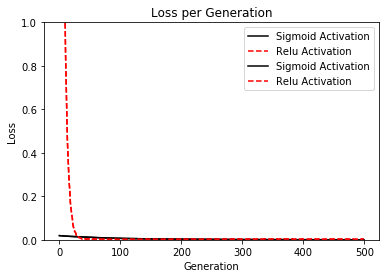

In [62]:
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [63]:
### Implementing a One-Layer Neural Network

In [64]:
from sklearn import datasets

In [65]:
iris = datasets.load_iris()
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])
sess = tf.Session()

In [66]:
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)

In [68]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

In [69]:
batch_size = 50
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [70]:
hidden_layer_nodes = 5
A1 = tf.Variable(tf.random_normal(shape=[3,hidden_layer_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))

In [71]:
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2),
b2))

In [72]:
loss = tf.reduce_mean(tf.square(y_target - final_output))

In [73]:
my_opt = tf.train.GradientDescentOptimizer(0.005)
train_step = my_opt.minimize(loss)
init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [74]:
# First we initialize the loss vectors for storage.
loss_vec = []
test_loss = []
for i in range(500):
    # First we select a random set of indices for the batch.
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    # We then select the training values
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    # Now we run the training step
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    # We save the training loss
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(np.sqrt(temp_loss))

    # Finally, we run the test-set loss and save it.
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%50==0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss))

Generation: 50. Loss = 0.1773
Generation: 100. Loss = 0.118572
Generation: 150. Loss = 0.0923036
Generation: 200. Loss = 0.0709243
Generation: 250. Loss = 0.0513695
Generation: 300. Loss = 0.0697432
Generation: 350. Loss = 0.065231
Generation: 400. Loss = 0.0680753
Generation: 450. Loss = 0.0712517
Generation: 500. Loss = 0.0550388


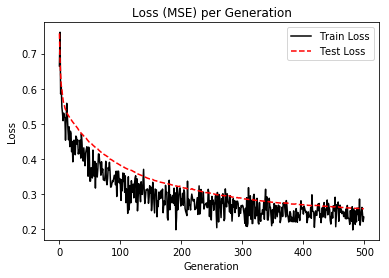

In [75]:
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()